# Finding spurious correlations

Data sources:  
|  | URL | Save location |
| --- | --- | --- |
| Baby Names | https://www.ssa.gov/oact/babynames/names.zip | `/names-by-yob` |
| Meat availability | https://www.ers.usda.gov/webdocs/DataFiles/50472/mtpcc.xlsx?v=6503.7 | `/mtpcc.xlsx` |

In [2]:
import pandas as pd
import glob

In [51]:
from sys import stderr

def load_names_by_yob() -> list[pd.DataFrame]:
    dfs = []
    for file in glob.glob("names-by-yob/yob*.txt"):
        raw_data = pd.read_csv(file, header=None)
        raw_data.index = pd.Series(zip(raw_data[1], raw_data[0]))
        row_df = raw_data.loc[raw_data[2] > 100].drop(raw_data[[0, 1]], axis=1).T
        row_df.index = [int(file[16:20])]
        dfs.append(row_df)
        print(f"processed {file}", file=stderr, end="\r")
    return pd.concat(dfs)

In [52]:
df = load_names_by_yob()

In [67]:
sorted_df = df.sort_index().reorder_levels([1, 0], axis=1).fillna(0)

In [68]:
sorted_df

,Jennifer,Michelle,Lisa,Kimberly,Amy,Angela,Melissa,Stephanie,Heather,Nicole,...,Arihanna,Jaydah,Kavion,Darey,Manny,Nolen,Braydin,Daylin,Xavior,Jaelyn
,F,F,F,F,F,F,F,F,F,F,...,F,F,M,M,M,M,M,M,M,M
1880,0.0,0.0,0.0,0.0,167,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1881,0.0,0.0,0.0,0.0,145,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1882,0.0,0.0,0.0,0.0,196,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1883,0.0,0.0,0.0,0.0,209,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1884,0.0,0.0,0.0,0.0,205,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,1050.0,1428.0,308.0,1837.0,1737,1348.0,1169.0,1133.0,223.0,1662.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018,919.0,1244.0,306.0,1703.0,1508,1239.0,1115.0,1027.0,210.0,1424.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019,784.0,1140.0,276.0,1530.0,1479,1269.0,933.0,894.0,162.0,1361.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
mtpcc = pd.read_excel("mtpcc.xlsx", sheet_name="Boneless", header=[0, 1], skiprows=[0, 3, 4, 5], skipfooter=7)

Carcass
Retail
Boneless
Leading


In [156]:
mtpcc.index = list(mtpcc.iloc[:, 0])
# beef_per_capita = mtpcc[("Red meat", "Beef")]
beef_per_capita = mtpcc[("Red meat", "Beef")] / mtpcc["Total2", "Unnamed: 11_level_1"]

In [166]:
names = sorted_df.columns
nan = float("nan")
corrs = pd.DataFrame(nan, index=range(-30, 33, 3), columns=names)
for j, name in enumerate(names):
    if sorted_df[name].isna().sum() > 50:
        continue
    c = corrs[name][0] = beef_per_capita.corr(sorted_df[name])
    for i in range(-30, 0, 3):
        corrs[name][i] = beef_per_capita.corr(sorted_df[name].shift(i))
    for i in range(0, 33, 3):
        corrs[name][i] = beef_per_capita.corr(sorted_df[name].shift(i))
    print(f"processed {j+1}/{len(names)}", end="\r", file=stderr)
corrs

,Jennifer,Michelle,Lisa,Kimberly,Amy,Angela,Melissa,Stephanie,Heather,Nicole,...,Arihanna,Jaydah,Kavion,Darey,Manny,Nolen,Braydin,Daylin,Xavior,Jaelyn
,F,F,F,F,F,F,F,F,F,F,...,F,F,M,M,M,M,M,M,M,M
-30,-0.260964,-0.361175,-0.510062,-0.386770,-0.361340,-0.424560,-0.258545,-0.057715,-0.175377,0.123573,...,0.073847,0.073847,0.073847,0.073847,0.073847,0.073847,0.073847,0.073847,0.073847,0.073847
-27,-0.076181,-0.195709,-0.375002,-0.236903,-0.204971,-0.273479,-0.071874,0.167682,0.001796,0.317718,...,0.081139,0.081139,0.081139,0.081139,0.081139,0.081139,0.081139,0.081139,0.081139,0.081139
-24,0.092510,-0.038174,-0.282776,-0.083964,-0.050751,-0.117691,0.117806,0.362590,0.197612,0.488058,...,0.051389,0.051389,0.051389,0.051389,0.051389,0.051389,0.051389,0.051389,0.051389,0.051389
-21,0.260376,0.121769,-0.187245,0.057006,0.143029,0.040879,0.289714,0.540081,0.403094,0.620934,...,-0.029007,-0.029007,-0.029007,-0.029007,-0.029007,-0.029007,-0.029007,-0.029007,-0.029007,-0.029007
-18,0.447759,0.285254,-0.061868,0.199974,0.305472,0.213890,0.457172,0.694585,0.555253,0.745662,...,-0.085640,-0.085640,-0.085640,-0.085640,-0.085640,-0.085640,-0.085640,-0.085640,-0.085640,-0.085640
-15,0.582010,0.444679,0.087097,0.345375,0.454401,0.376290,0.624692,0.788671,0.677675,0.786966,...,-0.106556,-0.106556,-0.106556,-0.106556,-0.106556,-0.106556,-0.106556,-0.106556,-0.106556,-0.106556
-12,0.675324,0.546008,0.238217,0.474999,0.587327,0.522494,0.718529,0.798300,0.764816,0.766839,...,-0.086319,-0.086319,-0.086319,-0.086319,-0.086319,-0.086319,-0.086319,-0.086319,-0.086319,-0.086319
-9,0.759464,0.617477,0.368328,0.562706,0.694833,0.637403,0.759277,0.763785,0.800049,0.712827,...,-0.095021,-0.095021,-0.095021,-0.095021,-0.095021,-0.095021,-0.095021,-0.095021,-0.095021,-0.095021
-6,0.782798,0.691336,0.477301,0.630799,0.748946,0.722685,0.776372,0.692618,0.752773,0.607347,...,-0.120412,-0.120412,-0.120412,-0.120412,-0.120412,-0.120412,-0.120412,-0.120412,-0.120412,-0.120412


In [286]:
for i in range(0, 20):
    print(i, beef_per_capita.loc[1930:].corr(sorted_df[("Maggie", "F")].loc[1930:].shift(i)))

0 -0.7661106794503239
1 -0.7915968367697549
2 -0.8172347600384173
3 -0.8415987270908529
4 -0.8605529832797598
5 -0.8710956562416023
6 -0.8752828046557005
7 -0.8835642349316345
8 -0.8895063973113971
9 -0.8869457509821402
10 -0.8755203649444852
11 -0.863962105414103
12 -0.8507663286140027
13 -0.8305769803666927
14 -0.8104084689580616
15 -0.7930799658674968
16 -0.7737934504570603
17 -0.7404438159369201
18 -0.7062576089685854
19 -0.6698043508637804


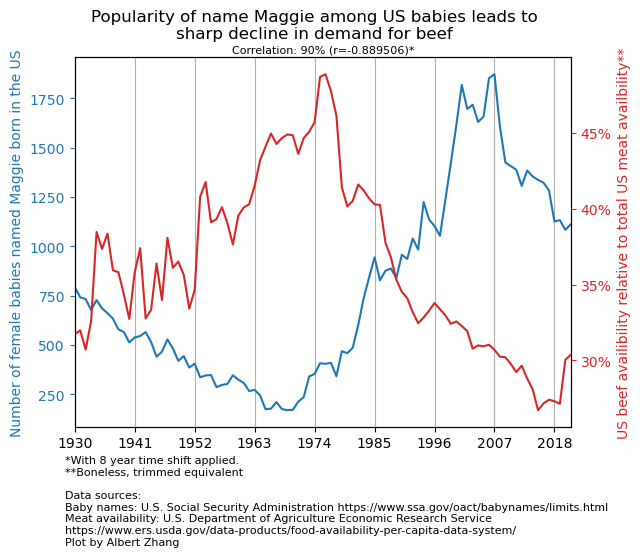

In [310]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax1 = plt.subplots()

data = sorted_df[("Maggie", "F")]

color="tab:blue"
data.plot(ax=ax1, color=color)
ax1.set_xlim(1930, 2021)
ax1.set_ylabel("Number of female babies named Maggie born in the US", color=color)
ax1.tick_params(axis="y", labelcolor=color, color=color)
ax1.set_xticks(range(1930, 2020, 11))
ax1.grid(axis="x", which="both")

ax2 = ax1.twinx()

color="tab:red"
beef_per_capita.plot(ax=ax2, color=color)
ax2.set_ylabel("US beef availibility relative to total US meat availbility**", color=color)
ax2.tick_params(axis="y", labelcolor=color, color=color)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

ft = fig.suptitle("Popularity of name Maggie among US babies leads to\nsharp decline in demand for beef")
ax1.set_title("Correlation: 90% (r=-0.889506)*", fontsize=8, pad=3)

data_source_txt = """*With 8 year time shift applied.
**Boneless, trimmed equivalent

Data sources:
Baby names: U.S. Social Security Administration https://www.ssa.gov/oact/babynames/limits.html
Meat availability: U.S. Department of Agriculture Economic Research Service
https://www.ers.usda.gov/data-products/food-availability-per-capita-data-system/
Plot by Albert Zhang"""
extra = fig.text(0.11, 0.05, data_source_txt, verticalalignment="top", fontsize=8)

plt.savefig("maggie-beef.png", bbox_extra_artists=(ft, extra), bbox_inches="tight")